In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Evaluating Data

In [3]:
df = pd.read_csv('euro2024_players.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [5]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [6]:
df.isnull().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

We do not have any missing values

In [7]:
df.head(3)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany


In [8]:
df['MarketValue'] = df['MarketValue'] / 1000000

There are huge numbers in market value column that can be hard to evaluate later. Thus I converted them from euro to million euro by dividing them 1 million

In [9]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

# Data Visulation(Graphs)

**1) Position**

In [10]:
df['Position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Right Midfield', 'Left Midfield'], dtype=object)

In [11]:
gk = df['Position'].value_counts()['Goalkeeper']
cb = df['Position'].value_counts()['Centre-Back']
lb = df['Position'].value_counts()['Left-Back']
rb = df['Position'].value_counts()['Right-Back']
dm = df['Position'].value_counts()['Defensive Midfield']
cm = df['Position'].value_counts()['Central Midfield']
am = df['Position'].value_counts()['Attacking Midfield']
lw = df['Position'].value_counts()['Left Winger']
rw = df['Position'].value_counts()['Right Winger']
ss = df['Position'].value_counts()['Second Striker']
cf = df['Position'].value_counts()['Centre-Forward']
rm = df['Position'].value_counts()['Right Midfield']
lm = df['Position'].value_counts()['Left Midfield']

Here I wanna classify positions to defence, goalkeeper, midfield and attack to use it in graphs better

In [24]:
position_type = []

for i in df['Position']:
  if i == 'Goalkeeper':
    position_type.append('Goalkeeper')
  elif i == 'Centre-Back' or i == 'Left-Back' or i == 'Right-Back':
    position_type.append('Defence')
  elif i == 'Defensive Midfield' or i == 'Central Midfield' or i == 'Attacking Midfield' or i == 'Right Midfield' or i == 'Left Midfield':
    position_type.append('Midfield')
  else:
    position_type.append('Attack')

df['Position Type'] = position_type

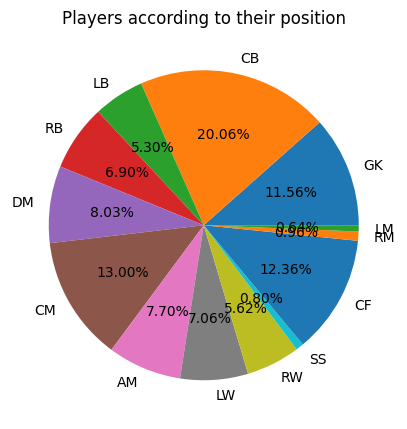

In [12]:
labels = ['GK', 'CB', 'LB', 'RB', 'DM', 'CM', 'AM', 'LW', 'RW', 'SS', 'CF', 'RM', 'LM']
values = [gk, cb, lb, rb, dm, cm, am, lw, rw, ss, cf, rm, lm]
plt.figure(figsize = (10, 6))
plt.title('Players according to their position')
plt.pie( values, labels = labels, autopct = '%1.2f%%')
plt.show()

In [22]:
goalkeeper = gk
defense = lb + rb + cb
midfield = rm + lm + cm + am + dm
attack = lw + cf + ss + rw

([<matplotlib.patches.Wedge at 0x7c7cf1c1a980>,
 [Text(1.028290735168841, 0.3906637479545867, 'Goalkeeper'),
  Text(-0.18494040314228566, 1.084341757604847, 'Defence'),
  Text(-0.9291765920338868, -0.5887536503634537, 'Midfield'),
  Text(0.7569552571448406, -0.7981345367046765, 'Attack')],
 [Text(0.5608858555466405, 0.21308931706613818, '11.56%'),
  Text(-0.1008765835321558, 0.5914591405117348, '32.26%'),
  Text(-0.5068235956548474, -0.321138354743702, '30.34%'),
  Text(0.4128846857153675, -0.4353461109298235, '25.84%')])

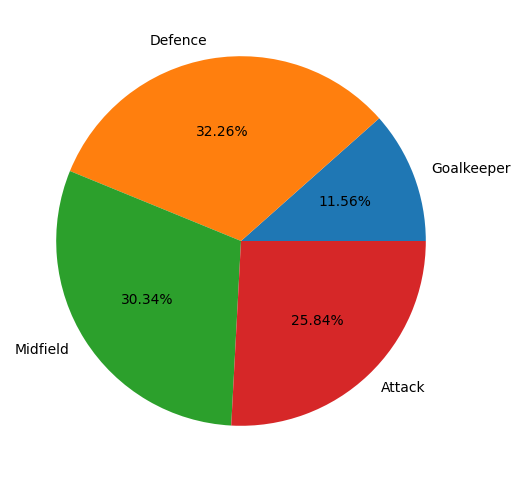

In [23]:
plt.figure(figsize = (10, 6))
labels = ['Goalkeeper', 'Defence', 'Midfield', 'Attack']
values = [gk, defense, midfield, attack]

plt.pie(values, labels = labels, autopct = '%1.2f%%')

**2) Age**

<Axes: xlabel='Age', ylabel='Position Type'>

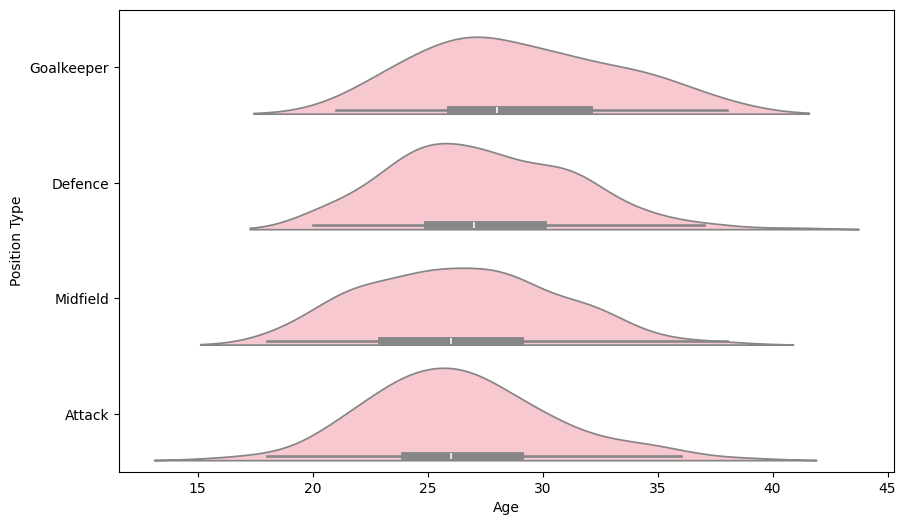

In [27]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, y = 'Position Type', x = 'Age', split = True, color = 'pink')

Position have almost similar age distributions but roughly, we can say that goalkeepers can play longer than other positions

<Axes: xlabel='Age', ylabel='Density'>

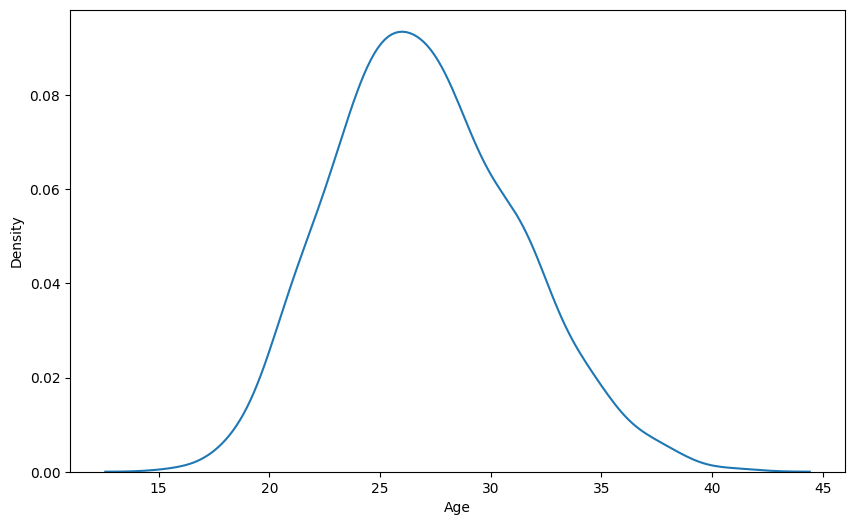

In [19]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['Age'])

Distributin of players due to their age is a normal distribution

<Axes: xlabel='Age', ylabel='MarketValue'>

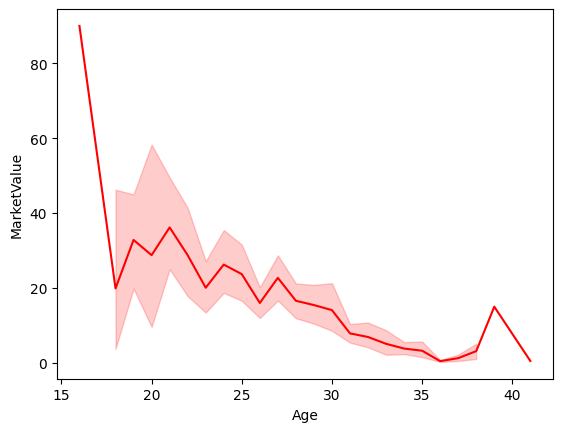

In [21]:
sns.lineplot(data = df, x = 'Age', y = 'MarketValue', color = 'r')

Except some exceptionals, player's market value decreases age by age in general.

**3) Height**

<Axes: xlabel='Height', ylabel='Position Type'>

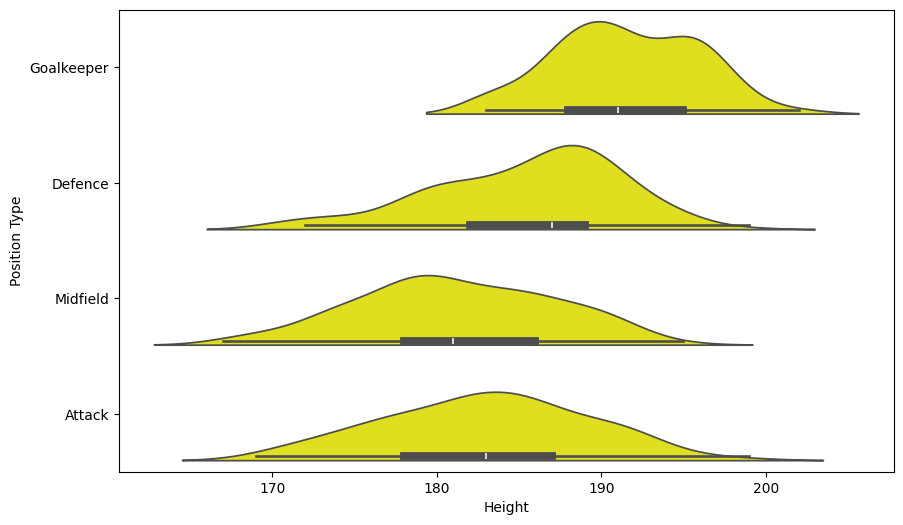

In [28]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Height', y = 'Position Type', split = True, color = 'yellow')

Spesifically, goalkeeper shorter than 180 cm does not exist. Also defensive players are taller than midfield and attackers.

**4) Foot**

In [33]:
right = df['Foot'].value_counts()['right']
left = df['Foot'].value_counts()['left']
both = df['Foot'].value_counts()['both']
print(f'right: {right} left: {left} both: {both}')

right: 436 left: 150 both: 31


([<matplotlib.patches.Wedge at 0x7c7cebde0a30>,
 [Text(-0.6649995817687755, 0.876228027540408, 'right'),
  Text(0.5189995316853492, -0.9698657051934502, 'left'),
  Text(1.0863254513449758, -0.17290752950677063, 'both')],
 [Text(-0.36272704460115024, 0.4779425604765861, '70.66%'),
  Text(0.28309065364655406, -0.5290176573782455, '24.31%'),
  Text(0.5925411552790777, -0.09431319791278396, '5.02%')])

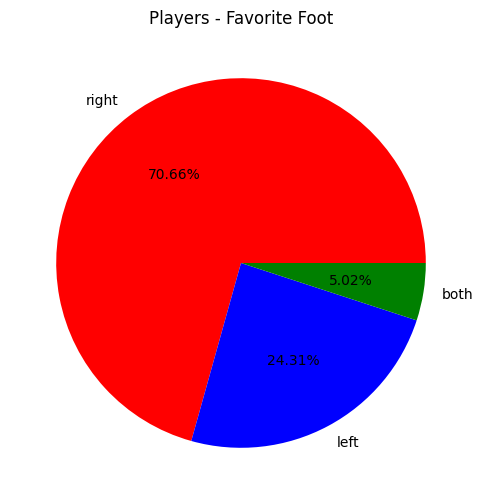

In [36]:
values = [right, left, both]
labels = ['right', 'left', 'both']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (10 ,6))
plt.title('Players - Favorite Foot')
plt.pie(values, labels = labels, autopct = '%1.2f%%', colors = colors)

**5) Caps**

<Axes: xlabel='Age', ylabel='Caps'>

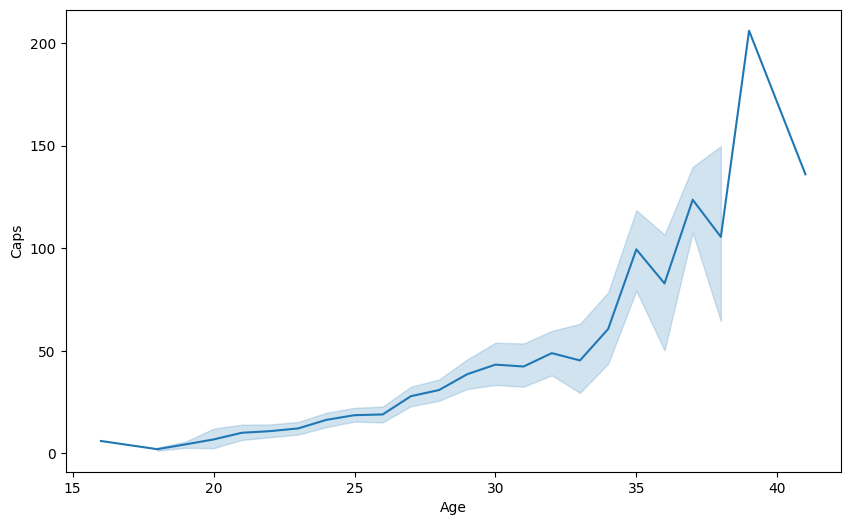

In [38]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Age', y = 'Caps')

As expected, old players played more than youngs.

<Axes: xlabel='Position Type', ylabel='Caps'>

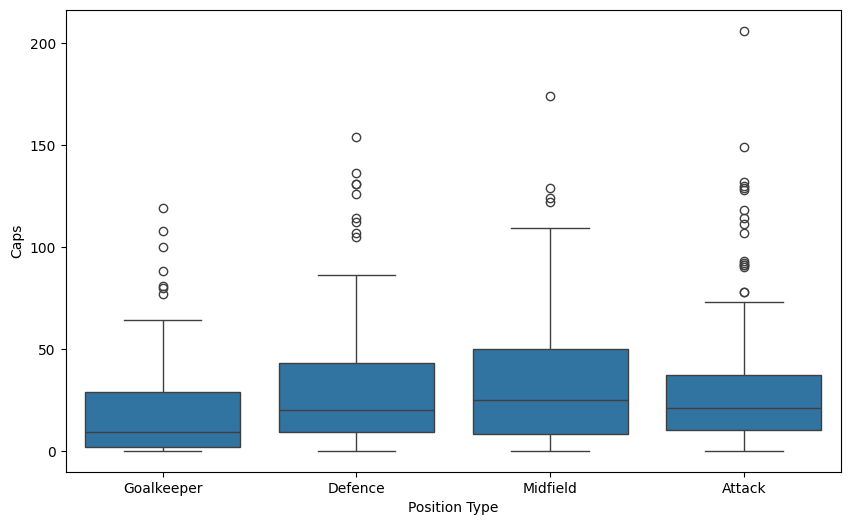

In [44]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Position Type', y = 'Caps')

Except outliers, in general, midfield and defence positions have been playing more than other positions

**6) Goals**

<Axes: xlabel='Position Type', ylabel='Goals'>

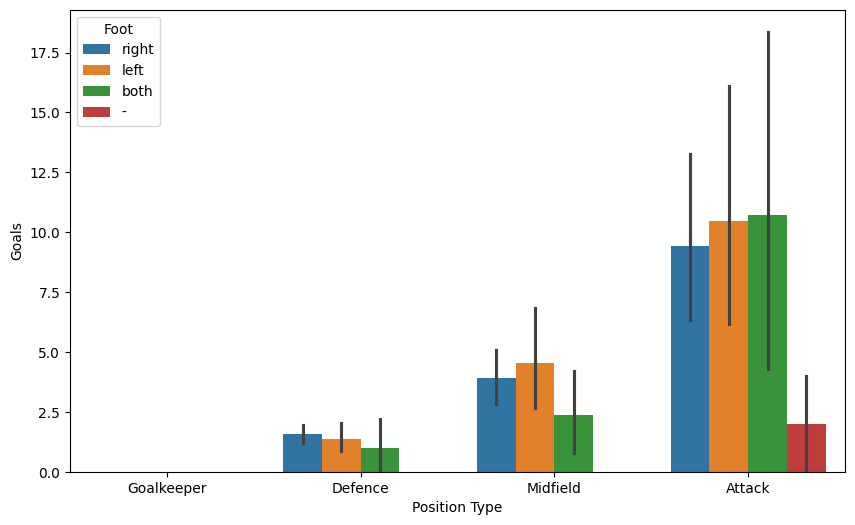

In [46]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Position Type', y = 'Goals', hue = 'Foot')

Goal number graph due to position type and fav foot

<Axes: xlabel='Goals', ylabel='MarketValue'>

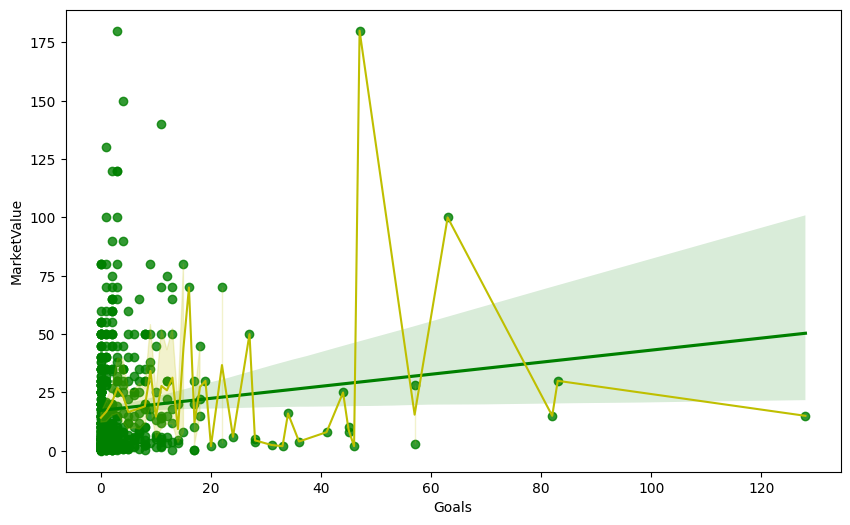

In [50]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df, x = 'Goals', y = 'MarketValue', color = 'green')
sns.lineplot(data = df, x = 'Goals', y = 'MarketValue', color = 'y')

Normally we think that there must be an exact linear proportion between goal number and market value. However there are lots of things such as age, club, experience, performance etc. that affect market value. Thus the slope is not sharp as we expect.

**7) Market Value**

In [51]:
df.head(3)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country,Position Type
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28.0,Germany,Goalkeeper
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4.0,Germany,Goalkeeper
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3.0,Germany,Goalkeeper


<Axes: xlabel='Country', ylabel='MarketValue'>

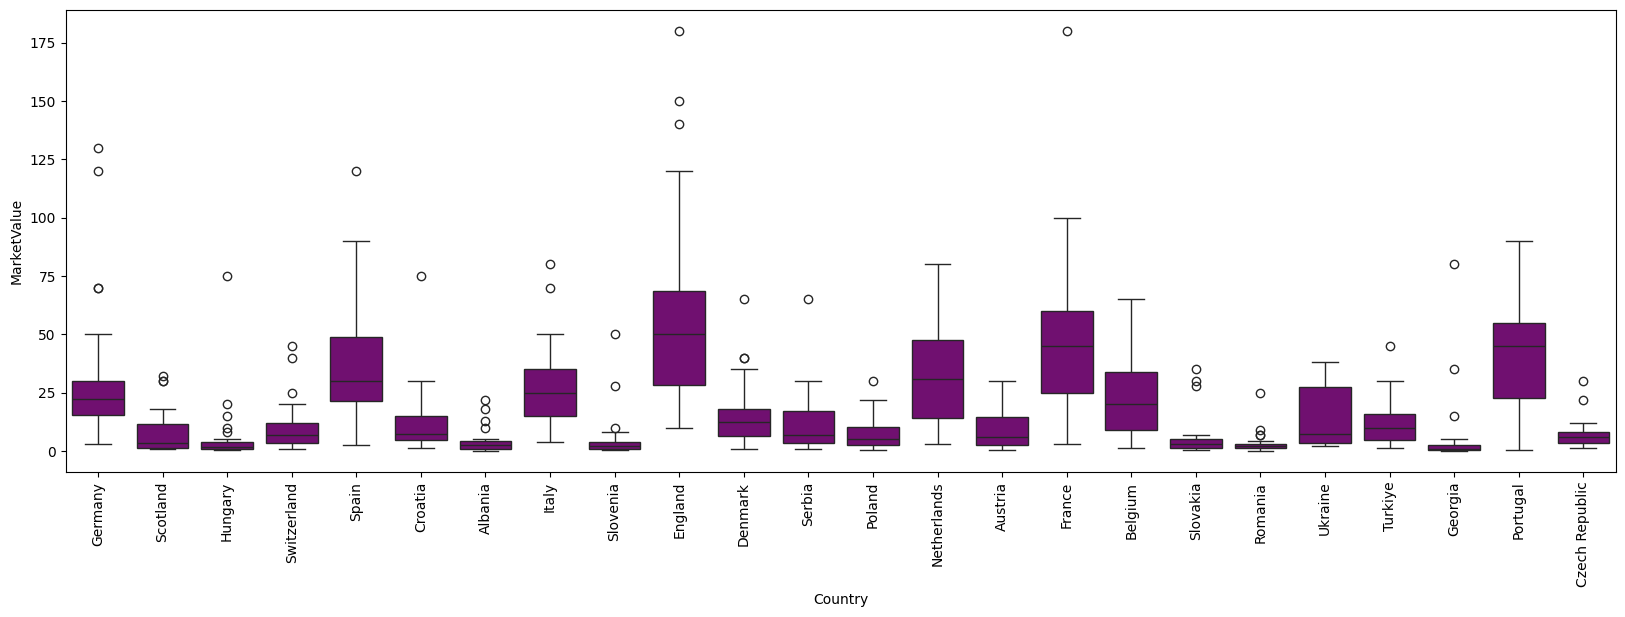

In [54]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
sns.boxplot(data = df, x = 'Country', y = 'MarketValue', color = 'purple')

Market Values due to countries

# Correlation Analysis

In [69]:
numeric_columns = df.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

Only numeric values can be used in correlation analysis

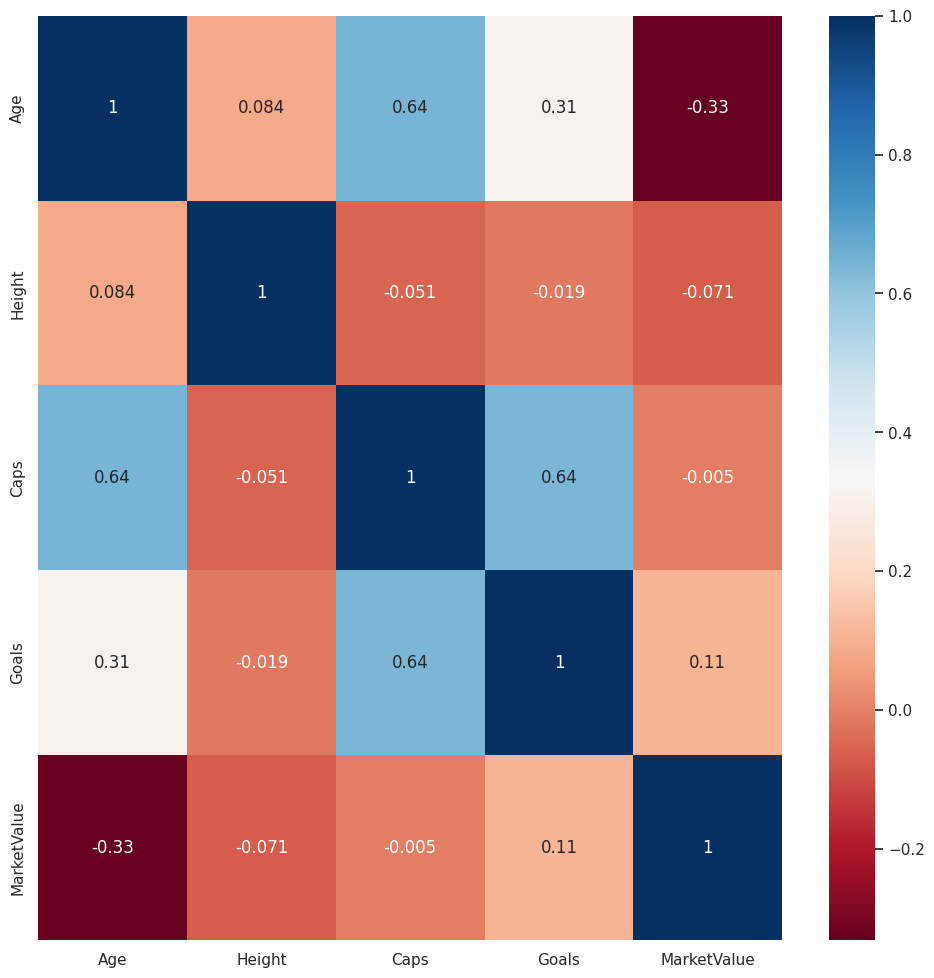

In [71]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(correlation, cmap="RdBu", annot=True)
plt.show()

In correlation analysis, 1 means there is an exact linear proportion while -1 means the opposite. 0 means there is not any relationship between these two variables